In [1]:
import time
import requests
from bs4 import BeautifulSoup
import itertools 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

2023-02-05 13:47:28.033657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Acquisition
For this section , we used BeautifulSoup libray as learned.
For each column , we created a list and insrted the relavent data.
At the end we combined all lists to one list of lists. This is the dataset.

In [2]:
main_url= 'https://www.truecar.com/new-cars-for-sale/listings/'
response = requests.get(main_url)
soup = BeautifulSoup(response.content, 'html.parser')


In [3]:
car_urls = []
overview_questions = []

cars = soup.find_all("div", {"class": "card-content order-3 vehicle-card-body"})
for car in cars:
    car_url = "https://www.truecar.com"+car.find("a")["href"]
    car_urls.append(car_url)

In [4]:
Style = []
Exterior_Color=[]
Interior_Color=[]
Engine=[]
Drive_Type=[]
Fuel_Type=[]
Transmission=[]
Cab_Type=[]
Price=[]
Moonroof=[]
Backup_Camera=[]
Parking_Sensors=[]
Bluetooth=[]
Navigation=[]
Front_Heated_Seats=[]
Names = []
Brand=[]
Year=[]
car_names=[]

myList= [Names,Brand,Year, Style, Exterior_Color, Interior_Color, Engine, Drive_Type, Fuel_Type, Transmission,Cab_Type, Price, 
         Moonroof, Backup_Camera, Parking_Sensors, Bluetooth, Navigation, Front_Heated_Seats]


In order to get the relavent data for our research, we built the get_attributes function and than called it 300 times , as each times the data is taken from all 30 cars in each page.

In [5]:
def get_attributes ():

    for car_url in car_urls:    
        response = requests.get(car_url)
        cars_soup = BeautifulSoup(response.content, 'html.parser')
        vehicle_overview = cars_soup.find("div",{"class": "py-5"})
        price = cars_soup.find("div",{"data-test": "vdpPreProspectPrice"})
        questions = vehicle_overview.find_all("div",{"class": "heading-4"})
        answers = vehicle_overview.find_all("p",{"class": "text-base"})
        popular_features = cars_soup.find("div",{"class": "bg-light py-4"})
        features = popular_features.find_all("p",{"class": "text-base"})
        list1 = []
        list2 = []
        
        
        name = car.find("span",{"class": "truncate"}).get_text()
        car_names.append(name)
        
        for question, answer in zip(questions, answers):
            q = question.get_text()
            a = answer.get_text()
            if (q == 'Style'):
                myList[3].append(a)
            if (q == 'Exterior Color'):
                myList[4].append(a)
            if (q == 'Interior Color'):
                myList[5].append(a)
            if (q == 'Engine'):
                myList[6].append(a)
            if (q == 'Drive Type'):
                myList[7].append(a)
            if (q == 'Fuel Type'):
                myList[8].append(a)
            if (q == 'Transmission'):
                myList[9].append(a)
            if (q == 'Cab Type'):
                myList[10].append(a)

                       
        myList[11].append(price.get_text())
        
        for feat in features:
            f = feat.get_text()
            list1.append(f)
    
        if 'Moonroof' in list1:
            Moonroof.append(1)
        else:
            Moonroof.append(0)
        if 'Backup Camera' in list1:
            Backup_Camera.append(1)
        else:
            Backup_Camera.append(0)
        if 'Parking Sensors' in list1:
            Parking_Sensors.append(1)
        else:
            Parking_Sensors.append(0)
        if 'Bluetooth' in list1:
            Bluetooth.append(1)
        else:
            Bluetooth.append(0)
        if 'Navigation' in list1:
            Navigation.append(1)
        else:
            Navigation.append(0)
        if 'Front Heated Seats' in list1:
            Front_Heated_Seats.append(1)
        else:
            Front_Heated_Seats.append(0)
                
        car_info = cars_soup.find("div",{"data-test": "vdpBreadcrumbs"})
        info = car_info.find_all("a")
        for i in info:
            s = i.get_text() 
            list2.append(s)
        Brand.append(list2[1])
        Names.append(list2[2])
        Year.append(list2[3])

In [6]:
button_next_urls = []
for i in range(1,300):
    button_next = soup.find("li", {"data-test": "paginationDirectionalItem"})
    next_page_url = "https://www.truecar.com"+button_next.find("a")["href"]
    button_next_urls.append(next_page_url)
for button in button_next_urls:
    get_attributes()
   
 

# Handling the Data
In order to be able to analyze the data further, we needed to convert it to numeric values later in the code. Therefore, we removed unwanted characters such as '$' and ',' . We also dropped columns with irrelevant data to our analysis, and rows with missing data, such as price.

In [127]:
for i in range(len(Price)):
    Price[i] = Price[i].replace("$", "")
    Price[i] = Price[i].replace(",", "")
    Price[i] = Price[i].replace("No Price Available", "0")

In [128]:
df = pd.DataFrame(myList)
df2= df.transpose()

df2.columns =['Names','Brand','Year', 'Style', 'Exterior_Color', 'Interior_Color', 'Engine', 'Drive_Type', 'Fuel_Type', 'Transmission','Cab_Type', 'Price', 
         'Moonroof', 'Backup_Camera', 'Parking_Sensors', 'Bluetooth', 'Navigation', 'Front_Heated_Seats']
df2.to_csv(("/Users/edenbenzikri/projcsv.csv"))


In [129]:
data = pd.read_csv("/Users/edenbenzikri/projcsv.csv" , names = ['Names','Brand','Year', 'Style', 'Exterior_Color', 'Interior_Color', 'Engine', 'Drive_Type', 'Fuel_Type', 'Transmission','Cab_Type', 'Price', 
         'Moonroof', 'Backup_Camera', 'Parking_Sensors', 'Bluetooth', 'Navigation', 'Front_Heated_Seats'] , header = None)
#replacing non-numeric cab type values to NaN for dropna
data['Cab_Type'] = pd.to_numeric(df2['Cab_Type'], errors='coerce')
data['Price'] = pd.to_numeric(df2['Price'], errors='ignore')
data['Year'] = pd.to_numeric(df2['Year'], errors='ignore')

data.loc[data.Price < 200, "Price"] = np.nan
data.dropna(axis=1 , thresh=5 , inplace= True)
data.dropna(axis=0 , how='any' , inplace= True)

data.to_csv("/Users/edenbenzikri/finalData.csv", header=None)
data.head()


,Names,Brand,Year,Style,Exterior_Color,Interior_Color,Engine,Drive_Type,Fuel_Type,Transmission,Price,Moonroof,Backup_Camera,Parking_Sensors,Bluetooth,Navigation,Front_Heated_Seats
0.0,Silverado 1500,Chevrolet,2023.0,Pickup Truck,Red Hot,Jet Black,2.7L Inline-4 Gas Turbocharged,RWD,Gas,Automatic,42670.0,0,1,0,1,0,0
1.0,Silverado 2500HD,Chevrolet,2023.0,Pickup Truck,Summit White,Jet Black,6.6L V-8 Gas,RWD,Gas,Automatic,46073.0,0,1,0,1,0,0
2.0,Civic,Honda,2023.0,Sedan,Platinum White Pearl,Black,2.0L Inline-4 Gas,FWD,Gas,Automatic,26364.0,0,1,0,1,0,0
3.0,Tucson,Hyundai,2023.0,SUV,Shimmering Silver,Black,2.5L Inline-4 Gas,FWD,Gas,Automatic,32474.0,1,1,0,1,0,1
4.0,Escape,Ford,2022.0,SUV,Agate Black Metallic,Dark Earth Gray,1.5L Inline-3 Gas Turbocharged,FWD,Gas,Automatic,30582.0,0,1,0,1,0,0


# basic statistics
In this section we ran some basic statistics functions to better understand our data with more information. The information contains the number of columns, column names,  the number of cells in each column (non-null values), the amount of unique values of each column and more.

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8073 entries, 0.0 to 8969.0
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               8073 non-null   object 
 1   Brand               8073 non-null   object 
 2   Year                8073 non-null   float64
 3   Style               8073 non-null   object 
 4   Exterior_Color      8073 non-null   object 
 5   Interior_Color      8073 non-null   object 
 6   Engine              8073 non-null   object 
 7   Drive_Type          8073 non-null   object 
 8   Fuel_Type           8073 non-null   object 
 9   Transmission        8073 non-null   object 
 10  Price               8073 non-null   float64
 11  Moonroof            8073 non-null   object 
 12  Backup_Camera       8073 non-null   object 
 13  Parking_Sensors     8073 non-null   object 
 14  Bluetooth           8073 non-null   object 
 15  Navigation          8073 non-null   object 
 16  

In [131]:
data.duplicated().sum()
data[data.duplicated()]
data.drop_duplicates()

data.describe(include = 'O')



,Names,Brand,Style,Exterior_Color,Interior_Color,Engine,Drive_Type,Fuel_Type,Transmission,Moonroof,Backup_Camera,Parking_Sensors,Bluetooth,Navigation,Front_Heated_Seats
count,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073,8073
unique,18,7,3,20,10,12,4,2,1,2,1,2,1,2,2
top,Silverado 1500,Chevrolet,SUV,Agate Black Metallic,Black,2.0L Inline-4 Gas,FWD,Gas,Automatic,0,1,0,1,0,1
freq,1495,1794,4186,897,3289,1495,2990,7774,8073,6279,8073,4784,8073,5382,4485


# EDA & Visualiztion
In this section ,we used the Seaborn data visualization library to display the data so we can understand it better.
Each visualization has a title which describes what it presents.

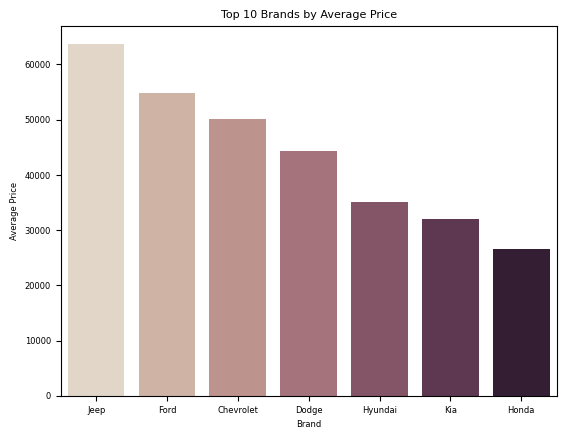

In [132]:
brand_prices = data.groupby('Brand')['Price'].mean().sort_values(ascending=False)
top_brands = brand_prices.head(10)
sns.barplot(x=top_brands.index, y=top_brands.values,palette="ch:.25")
plt.title("Top 10 Brands by Average Price", fontsize = 8)
plt.xlabel("Brand", fontsize = 6)
plt.ylabel("Average Price", fontsize = 6)
plt.tick_params(axis='both', which='major', labelsize=6)
plt.show()


<Figure size 700x400 with 0 Axes>

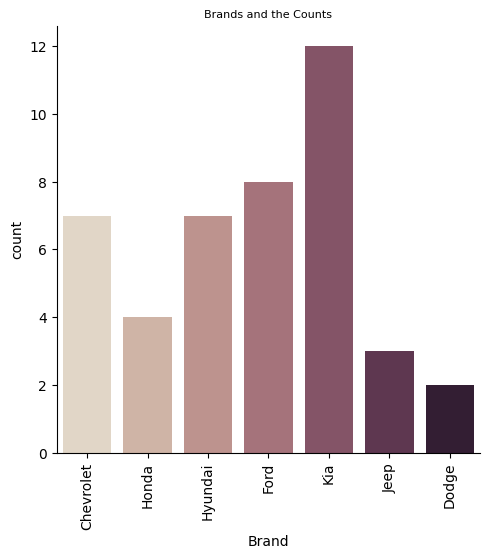

In [212]:
var = "Brand"
plt.figure(figsize=(7, 4))
sns.catplot(x=var, kind="count", palette="ch:.25", height=5, aspect=1, data=data );
plt.title("Brands and the Counts", fontsize = 8)
plt.xticks(rotation=90);

/var/folders/0c/0wx7_d3n7dz9ww3t49stv6nh0000gn/T/ipykernel_22967/710634109.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],kde=True )


Text(0.5, 1.0, 'The Denisity of Cars by its Prices')

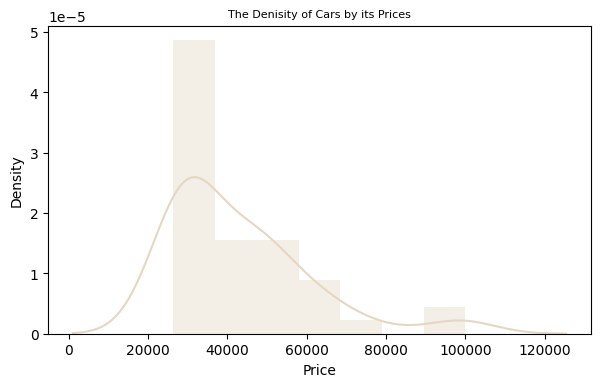

In [213]:
plt.figure(figsize=[7,4])
sns.set_palette("ch:.25")
sns.distplot(data['Price'],kde=True )
plt.title("The Denisity of Cars by its Prices", fontsize = 8)



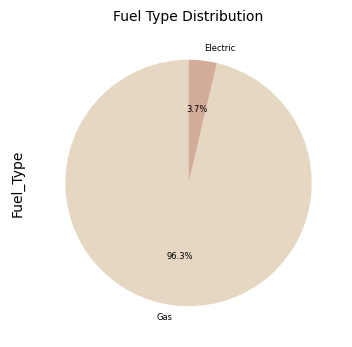

In [135]:
#The autopct parameter is used to show the percentage on each section of the chart


sns.set_palette("ch:.25")
fuel_counts = data['Fuel_Type'].value_counts()
ax = fuel_counts.plot.pie(autopct='%1.1f%%',fontsize = 6, startangle=90, figsize = (7,4))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.title("Fuel Type Distribution" , fontsize = 10)
plt.show()

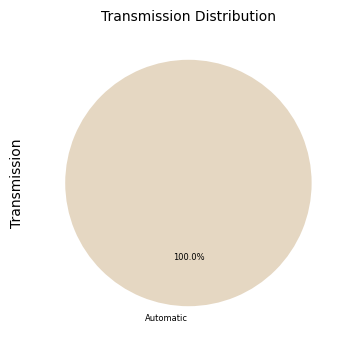

In [136]:
sns.set_palette("ch:.25")
transmission_counts = data['Transmission'].value_counts()
ax = transmission_counts.plot.pie(autopct='%1.1f%%',fontsize = 6, startangle=90, figsize = (7,4))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title("Transmission Distribution" , fontsize = 10)
plt.show()

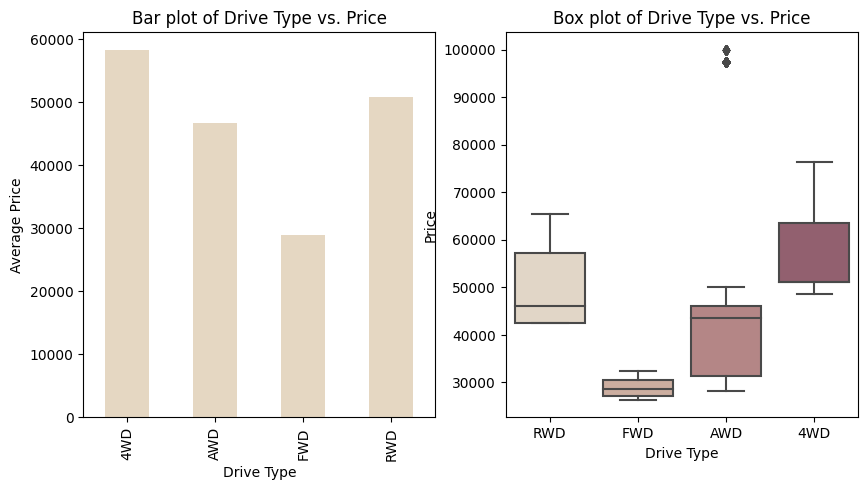

In [137]:

sns.set_palette("ch:.25")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

data.groupby(["Drive_Type"])["Price"].mean().plot(kind="bar", ax=ax1)
ax1.set_xlabel("Drive Type")
ax1.set_ylabel("Average Price")
ax1.set_title("Bar plot of Drive Type vs. Price")

sns.boxplot(x='Drive_Type', y='Price', data=data)
ax2.set_xlabel("Drive Type")
ax2.set_ylabel("Price")
ax2.set_title("Box plot of Drive Type vs. Price")
plt.show()

/var/folders/0c/0wx7_d3n7dz9ww3t49stv6nh0000gn/T/ipykernel_22967/3206540419.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)
/var/folders/0c/0wx7_d3n7dz9ww3t49stv6nh0000gn/T/ipykernel_22967/3206540419.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)
/var/folders/0c/0wx7_d3n7dz9ww3t49stv6nh0000gn/T/ipykernel_22967/3206540419.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)


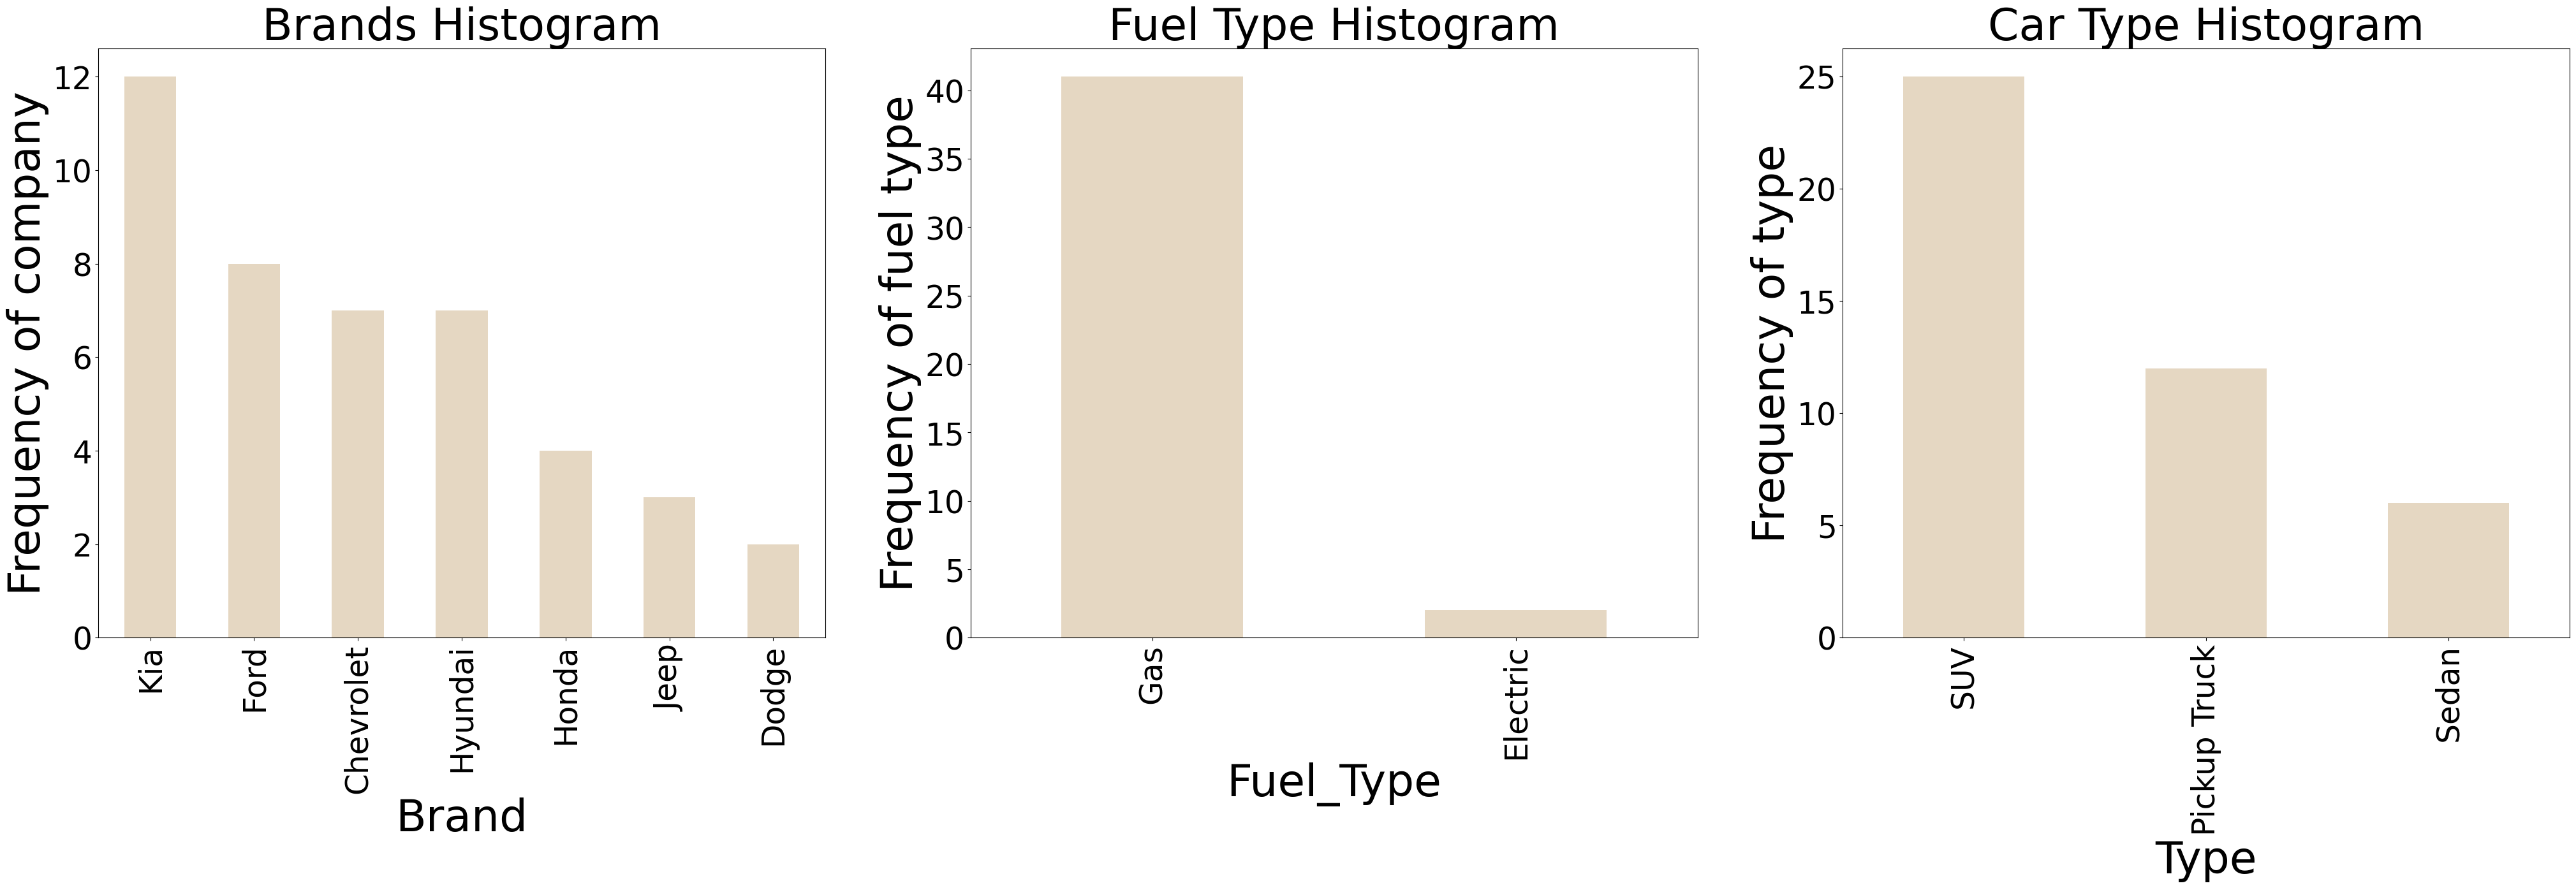

In [190]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

sns.set_palette("ch:.25")

plt.figure(figsize=(50, 12))

plt.subplot(1,3,1)
plt1 = data.Brand.value_counts().plot(kind="bar")
plt.title('Brands Histogram', fontsize=50)
plt1.set(xlabel = 'Brand', ylabel='Frequency of company')
plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)
plt1.set_xticklabels(plt1.get_xticklabels(), fontsize=35)
plt1.xaxis.label.set_size(50)
plt1.yaxis.label.set_size(50)


plt.subplot(1,3,2)
plt1 = data.Fuel_Type.value_counts().plot(kind="bar")
plt.title('Fuel Type Histogram', fontsize=50)
plt1.set(xlabel = 'Fuel_Type', ylabel='Frequency of fuel type')
plt1.xaxis.label.set_size(50)
plt1.yaxis.label.set_size(50)
plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)
plt1.set_xticklabels(plt1.get_xticklabels(), fontsize=35)


plt.subplot(1,3,3)
plt1 = data.Style.value_counts().plot(kind="bar")
plt.title('Car Type Histogram', fontsize=50)
plt1.set(xlabel = 'Type', ylabel='Frequency of type')
plt1.set_yticklabels(plt1.get_yticklabels(), fontsize=35)
plt1.set_xticklabels(plt1.get_xticklabels(), fontsize=35)
plt1.xaxis.label.set_size(50)
plt1.yaxis.label.set_size(50)

plt.show()


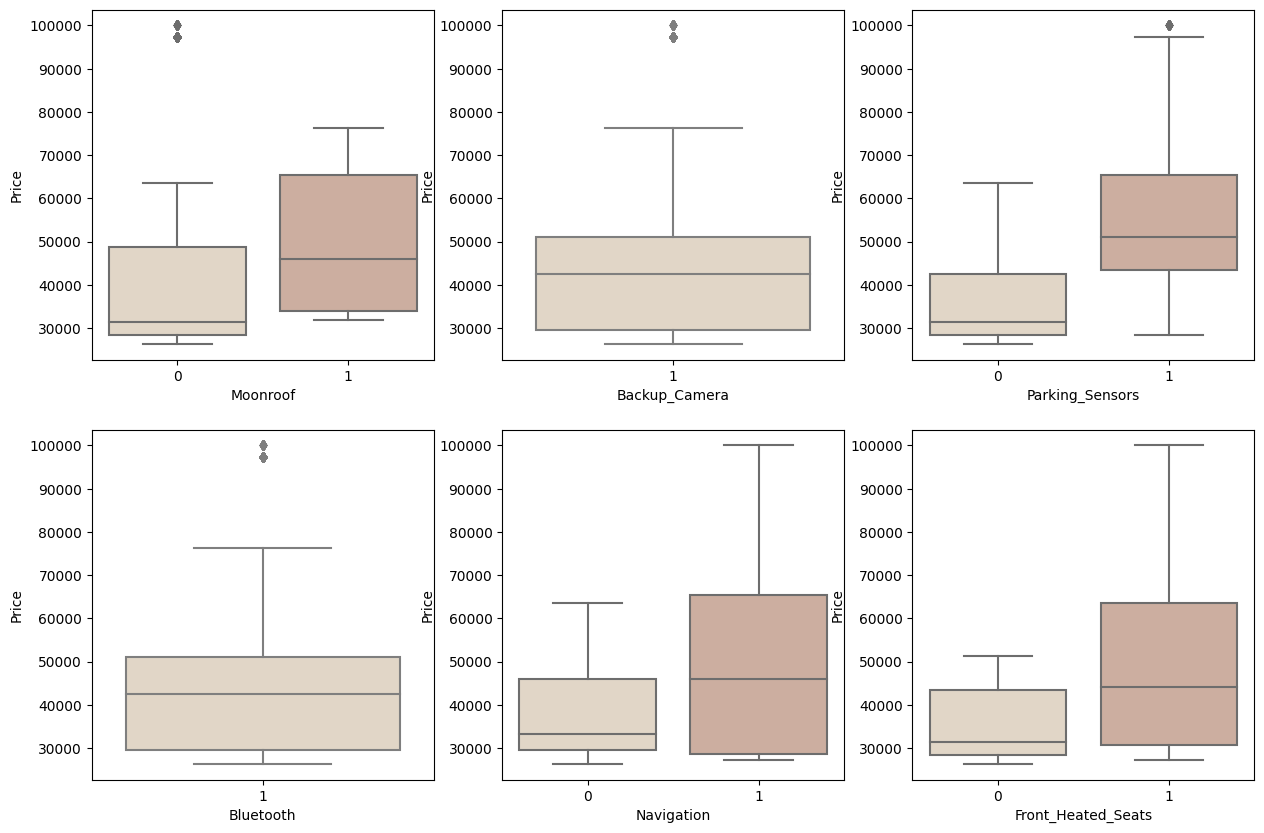

In [139]:
sns.set_palette("ch:.25")

#how the numeric features distribution on the price
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
features = ['Moonroof', 'Backup_Camera', 'Parking_Sensors', 'Bluetooth', 'Navigation', 'Front_Heated_Seats']
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='Price', data=data, ax=axs[i])


In [162]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_encoded = data.copy()

non_numeric_cols = data.columns[data.dtypes == object]

for col in non_numeric_cols:
    le.fit(data_encoded[col])
    
    data_encoded[col] = le.transform(data_encoded[col])


In [164]:
data_encoded.head()

,Names,Brand,Year,Style,Exterior_Color,Interior_Color,Engine,Drive_Type,Fuel_Type,Transmission,Price,Moonroof,Backup_Camera,Parking_Sensors,Bluetooth,Navigation,Front_Heated_Seats
0.0,13,0,2023.0,0,11,6,5,3,1,0,42670.0,0,0,0,0,0,0
1.0,14,0,2023.0,0,18,6,10,3,1,0,46073.0,0,0,0,0,0,0
2.0,0,3,2023.0,2,10,0,2,2,1,0,26364.0,0,0,0,0,0,0
3.0,17,4,2023.0,1,13,0,3,2,1,0,32474.0,1,0,0,0,0,1
4.0,2,2,2022.0,1,0,4,0,2,1,0,30582.0,0,0,0,0,0,0


# Finding the correlations

A heat map is a graphical representation of data where the values of a matrix are represented as colors.

Heat maps are useful because they can quickly reveal patterns and trends in large data sets, as well as areas of high and low concentration. 

Using the heat map we looked for relavent correlations to our research.


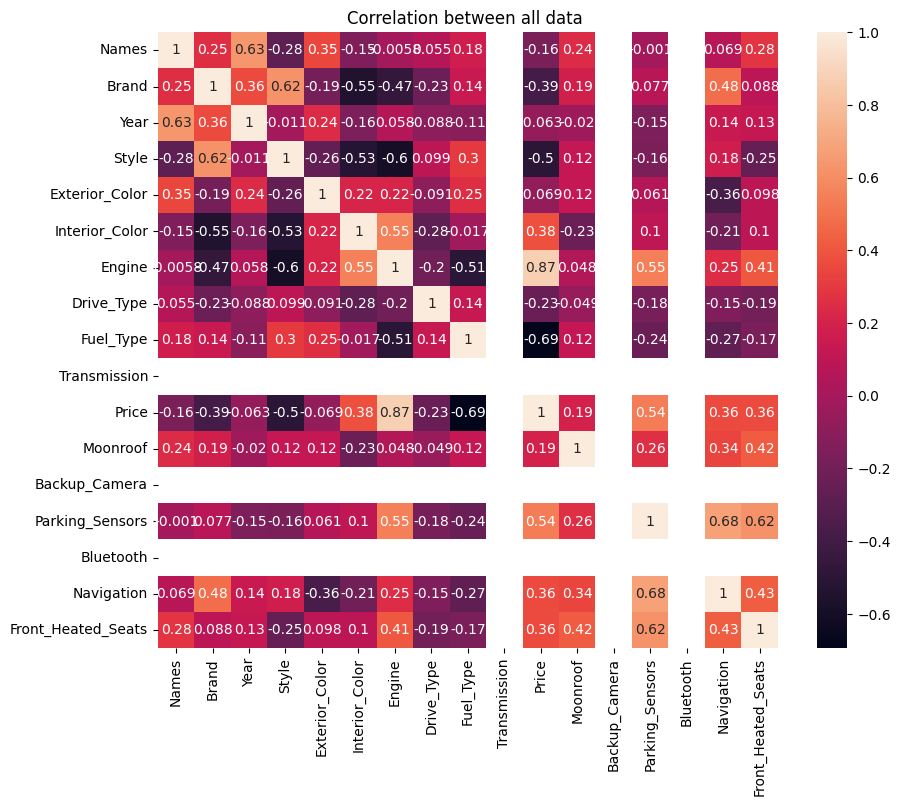

In [226]:

corr = data_encoded.corr()
sns.set_palette("ch:.25")
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr,annot=True,ax=ax)
ax.set_title("Correlation between all data ")

plt.show()

In [165]:
corr_matrix = data_encoded.corr()
print(corr_matrix)


                       Names     Brand      Year     Style  Exterior_Color  \
Names               1.000000  0.254492  0.632932 -0.281475        0.349256   
Brand               0.254492  1.000000  0.359547  0.618357       -0.189485   
Year                0.632932  0.359547  1.000000 -0.010999        0.243427   
Style              -0.281475  0.618357 -0.010999  1.000000       -0.257406   
Exterior_Color      0.349256 -0.189485  0.243427 -0.257406        1.000000   
Interior_Color     -0.145881 -0.546196 -0.155251 -0.527935        0.215515   
Engine             -0.005830 -0.468111  0.057658 -0.596943        0.219010   
Drive_Type          0.055379 -0.225998 -0.087534  0.099468       -0.091211   
Fuel_Type           0.177621  0.140500 -0.105593  0.300813        0.254008   
Transmission             NaN       NaN       NaN       NaN             NaN   
Price              -0.160157 -0.387052 -0.063091 -0.498272       -0.069019   
Moonroof            0.243850  0.185775 -0.019739  0.121581      

In the follwing code we revealed the relavent correlations for us.
We looked for correlations that are higher than 0.5 and also related to the price.
In this way, we figured which elements from our data effects the Car Prices the most.

In [166]:
# Find the highest correlations among all data categories
correlations = []
for i in range(corr.values.shape[0]):
    for j in range(corr.values.shape[1]):
        if i < j and corr.values[i][j] >= 0.5:
            correlations.append(corr.values[i][j])
tuple_arr = []
for i in range(corr.values.shape[0]):
    for j in range(corr.values.shape[1]):
        if i < j and corr.values[i][j] >= 0.5:
            tuple_arr.append((i,j))
print("Correlations: ", correlations)
print("Pairs found: ", tuple_arr)

cols_for_corr = ['Names','Brand','Year', 'Style', 'Exterior_Color', 'Interior_Color', 'Engine', 'Drive_Type', 'Fuel_Type', 'Transmission', 'Price', 
         'Moonroof', 'Backup_Camera', 'Parking_Sensors', 'Bluetooth', 'Navigation', 'Front_Heated_Seats']
corr_sort = np.argsort(correlations)
corr_pairs = []
for n_correlation in corr_sort:
    col_x, col_y = tuple_arr[n_correlation]
    if cols_for_corr[col_x] == 'Price' or cols_for_corr[col_y] == 'Price':
        col_name_x, col_name_y = cols_for_corr[col_x], cols_for_corr[col_y]
        print(f"Correlation between '{col_name_x}' and '{col_name_y}' is {correlations[n_correlation]}")
        corr_pairs.append((col_name_x,col_name_y))
        
x_cols = ['Price']
y_cols = []
for p1,p2 in corr_pairs:
    if p1 != 'Price':
        y_cols.append(p1)
    elif p2 != 'Price':
        y_cols.append(p2)
        
x = d[x_cols]
y = d[y_cols]

Correlations:  [0.6329319277294732, 0.6183573870094728, 0.5513333160447617, 0.8676534153201352, 0.5484288004149059, 0.5415356215808452, 0.6764096406522769, 0.6213824452921326]
Pairs found:  [(0, 2), (1, 3), (5, 6), (6, 10), (6, 13), (10, 13), (13, 15), (13, 16)]
Correlation between 'Price' and 'Parking_Sensors' is 0.5415356215808452
Correlation between 'Engine' and 'Price' is 0.8676534153201352


# Machine Learning
# Models
In this sction we used Regression Models for the Machine Learning.
This was needed because the element we were checking is continues numeric variable,

In [193]:
X = data_encoded.drop(columns=["Price"])
y = data_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("Test score:", score)

# evaluate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean of cross-validation scores:", mean_cv_score)

std_cv_score = np.std(cv_scores)
print("Standard deviation of cross-validation scores:", std_cv_score)


Test score: 0.9889768029103684
Cross-validation scores: [0.77481121 0.88189024 0.69290242 0.99130113 0.94350792]
Mean of cross-validation scores: 0.8568825818790499
Standard deviation of cross-validation scores: 0.10938270584439926


The test score is a measure of how well the model generalizes to new, unseen data. In this case, the decision tree model achieves a high test score of 0.989, indicating that it is able to predict the price of products accurately on new, unseen data.

The cross-validation scores are: [0.775, 0.882, 0.693, 0.991, 0.944]. These values represent the R^2 coefficient of determination, a measure of how well the model fits the data, with 1.0 being a perfect fit and 0 indicating that the model does not explain any of the variability in the data.

The mean of the cross-validation scores is 0.857, which indicates that the model performs well overall, but not as well as the test score.

n summary, the decision tree model seems to be a good fit for the data, with a high test score and reasonably good cross-validation scores.

In [221]:
train_x, test_x, train_y, test_y = train_test_split(d.drop("Price", axis=1), data_encoded["Price"], test_size=0.2, random_state=0)
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(train_x, train_y)
scores = cross_val_score(model, train_x, train_y, cv=5)
score = model.score(test_x, test_y)
print("Test score:", score)
print("Cross-validation scores:", scores)
print("Mean of cross-validation scores:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())


Test score: 0.9597787155549216
Cross-validation scores: [0.89105101 0.7457032  0.62753965 0.7942033  0.12111805]
Mean of cross-validation scores: 0.6359230420015407
Standard deviation of cross-validation scores: 0.2710310183545802


Overall, the results suggest that the random forest model is a good fit for the data, with a high R^2 score on the test set. However, the low mean of the cross-validation scores and high variability across folds suggest that the model may be overfitting the training data, and that its performance may not generalize well to new, unseen data.

In [224]:

X = data_encoded.drop(columns=["Price"])
y = data_encoded["Price"]

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # reducing test_size to 0.1
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("Test score:", score)
print("Cross-validation scores:", scores)
print("Mean of cross-validation scores:" ,scores.mean())
print("Standard deviation of cross-validation scores::" ,scores.std())



Test score: 0.8895689884398799
Cross-validation scores: [0.73922241 0.40462075 0.77640404 0.95991598 0.69212081]
Mean of cross-validation scores: 0.7144567981163386
Standard deviation of cross-validation scores:: 0.17955404596733476


Overall, the model appears to be reasonably effective at predicting prices based on the other features in the dataset.